In [868]:
import cv2
import numpy as np
import pandas as pd
import math
import random
from IPython.display import Image, display
import matplotlib.colors as mcolors
%matplotlib inline

def imshow (img):
    imgInline = cv2.imencode('.jpg', img)[1]
    display(Image(imgInline))

In [869]:
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

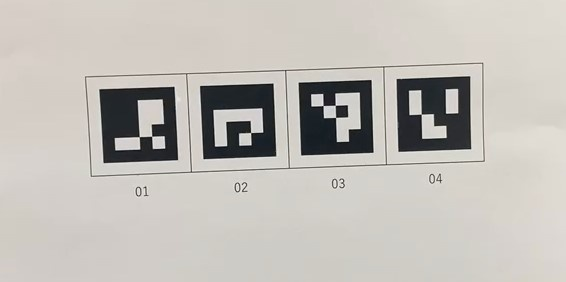

In [870]:
img = cv2.imread("src/img/trackingtest01.jpg")
imshow(img)

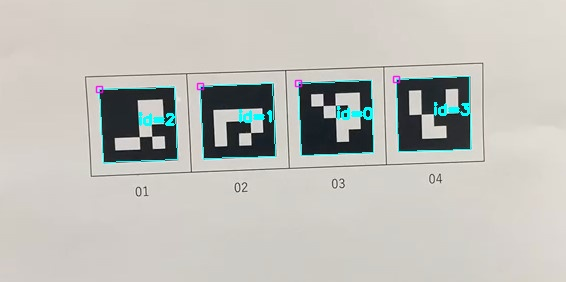

In [871]:
corners, ids, rejectedImgPoints = aruco.detectMarkers(img, dictionary)
aruco.drawDetectedMarkers(img, corners, ids, (255, 255, 0))
imshow(img)

In [872]:
print(np.squeeze([[3]]).copy())

3


In [873]:
def getCornersFromID(_corners, _ids, _id):
    if not np.any(_ids == [_id]):    #指定されたidがidsに存在しなければFalseを返す
        return np.nan
    index = np.where(_ids == _id)[0][0] #whereは[[1次元目のindex], [2次元目のindex]] で返ってくるが、ほしいのは1次元目のindexだけなので[0][0]で指定
    return tuple(map(lambda c: tuple(c),_corners[index][0]))    #_corners[index][0][0~3]にそれぞれ座標が入っているのでタプルにして返す

def getCenterPoint(corners):
    # cornersがFalseの場合はFalseを返す（TODO:指定の座標いがはすべてFalseを返すように改良）
    # Trueであれば、左上座標と右下座標を平均した値を返す
    if type(corners) != tuple or math.isnan(corners[0][0]) or math.isnan(corners[2][0]) or math.isnan(corners[0][1]) or math.isnan(corners[2][1]):
        return np.nan
    x = int((corners[0][0] + corners[2][0]) / 2)
    y = int((corners[0][1] + corners[2][1]) / 2)
    return (x,y)


In [874]:
getCornersFromID(corners, np.array([]), 0)

nan

In [875]:
ids = None # np.array([])
id_list = np.squeeze(ids).copy()
id_list = np.append(id_list, np.nan)
id_list = id_list[:-1]
print(id_list)
list(map(lambda id: getCenterPoint(getCornersFromID(corners, ids, 5)),id_list))

[None]


[nan]

In [876]:
type((1,2)) is tuple

True

In [877]:
a = pd.DataFrame(np.arange(9).reshape(3,3))
a

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [878]:
for id, position in a.iteritems():
    #"id: " + str(id))
    print(position)
    print("-----")

0    0
1    3
2    6
Name: 0, dtype: int32
-----
0    1
1    4
2    7
Name: 1, dtype: int32
-----
0    2
1    5
2    8
Name: 2, dtype: int32
-----


In [879]:
arr = np.arange(10)
arr[-20:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [880]:
centers = pd.Series([(0,0), (1,2), (2, 4), (3, 7), (4, 6), (5, 6), (7, 5), (8, 4), (9, 3)])
centers

0    (0, 0)
1    (1, 2)
2    (2, 4)
3    (3, 7)
4    (4, 6)
5    (5, 6)
6    (7, 5)
7    (8, 4)
8    (9, 3)
dtype: object

In [881]:
centers[7] = np.nan
centers

0    (0, 0)
1    (1, 2)
2    (2, 4)
3    (3, 7)
4    (4, 6)
5    (5, 6)
6    (7, 5)
7       NaN
8    (9, 3)
dtype: object

In [882]:

xs = pd.Series(list(map(lambda pos: pos[0] if type(pos) == tuple else pos,centers))).interpolate('spline', order=2).astype('int')
ys = pd.Series(list(map(lambda pos: pos[1] if type(pos) == tuple else pos,centers))).interpolate('spline', order=2).astype('int')

xs

0    0
1    1
2    2
3    3
4    4
5    5
6    7
7    7
8    9
dtype: int32

In [883]:
xs

0    0
1    1
2    2
3    3
4    4
5    5
6    7
7    7
8    9
dtype: int32

In [884]:
# newCenters = list(map(lambda xy: (xy[0], xy[1]) ,zip(xs, ys))) # pd.Series(list(map(lambda x, y: (x, y) ,zip(xs, ys))))
newCenters = list(zip(xs, ys))[-30:]
print(newCenters)

[(0, 0), (1, 2), (2, 4), (3, 7), (4, 6), (5, 6), (7, 5), (7, 4), (9, 3)]


In [885]:
d = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan])
e = pd.Series([1.,np.nan,np.nan,np.nan,np.nan,np.nan,])

In [886]:
d.interpolate("bfill")

0    1.0
1    1.0
2    1.0
3    NaN
4    NaN
5    NaN
dtype: float64

In [906]:
# colors = list(map(lambda color: tuple(map(lambda c: int(c * 255),mcolors.to_rgb(color))), mcolors.CSS4_COLORS.values()))
colors = list(map(lambda color: tuple(map(lambda c: int(c * 255),mcolors.to_rgb(color))), mcolors.CSS4_COLORS.values()))

random.shuffle(colors)
colors

[(127, 255, 0),
 (255, 165, 0),
 (255, 228, 196),
 (139, 69, 19),
 (250, 240, 230),
 (255, 192, 203),
 (245, 245, 220),
 (112, 128, 144),
 (135, 206, 250),
 (255, 240, 245),
 (255, 250, 240),
 (148, 0, 211),
 (210, 180, 140),
 (46, 139, 87),
 (160, 82, 45),
 (178, 34, 34),
 (100, 149, 237),
 (255, 99, 71),
 (218, 112, 214),
 (240, 128, 128),
 (255, 20, 147),
 (192, 192, 192),
 (106, 90, 205),
 (47, 79, 79),
 (230, 230, 250),
 (25, 25, 112),
 (205, 133, 63),
 (199, 21, 133),
 (255, 235, 205),
 (85, 107, 47),
 (255, 248, 220),
 (255, 215, 0),
 (255, 160, 122),
 (250, 250, 210),
 (250, 235, 215),
 (255, 0, 255),
 (255, 0, 255),
 (128, 0, 128),
 (0, 191, 255),
 (135, 206, 235),
 (154, 205, 50),
 (0, 100, 0),
 (220, 220, 220),
 (210, 105, 30),
 (205, 92, 92),
 (0, 128, 128),
 (32, 178, 170),
 (105, 105, 105),
 (255, 69, 0),
 (255, 255, 0),
 (138, 43, 226),
 (255, 228, 181),
 (186, 85, 211),
 (0, 255, 255),
 (255, 255, 224),
 (119, 136, 153),
 (221, 160, 221),
 (107, 142, 35),
 (238, 130, 23

In [916]:
for idx, (color, rgb) in enumerate(mcolors.CSS4_COLORS.items()):
    print(rgb)


#F0F8FF
#FAEBD7
#00FFFF
#7FFFD4
#F0FFFF
#F5F5DC
#FFE4C4
#000000
#FFEBCD
#0000FF
#8A2BE2
#A52A2A
#DEB887
#5F9EA0
#7FFF00
#D2691E
#FF7F50
#6495ED
#FFF8DC
#DC143C
#00FFFF
#00008B
#008B8B
#B8860B
#A9A9A9
#006400
#A9A9A9
#BDB76B
#8B008B
#556B2F
#FF8C00
#9932CC
#8B0000
#E9967A
#8FBC8F
#483D8B
#2F4F4F
#2F4F4F
#00CED1
#9400D3
#FF1493
#00BFFF
#696969
#696969
#1E90FF
#B22222
#FFFAF0
#228B22
#FF00FF
#DCDCDC
#F8F8FF
#FFD700
#DAA520
#808080
#008000
#ADFF2F
#808080
#F0FFF0
#FF69B4
#CD5C5C
#4B0082
#FFFFF0
#F0E68C
#E6E6FA
#FFF0F5
#7CFC00
#FFFACD
#ADD8E6
#F08080
#E0FFFF
#FAFAD2
#D3D3D3
#90EE90
#D3D3D3
#FFB6C1
#FFA07A
#20B2AA
#87CEFA
#778899
#778899
#B0C4DE
#FFFFE0
#00FF00
#32CD32
#FAF0E6
#FF00FF
#800000
#66CDAA
#0000CD
#BA55D3
#9370DB
#3CB371
#7B68EE
#00FA9A
#48D1CC
#C71585
#191970
#F5FFFA
#FFE4E1
#FFE4B5
#FFDEAD
#000080
#FDF5E6
#808000
#6B8E23
#FFA500
#FF4500
#DA70D6
#EEE8AA
#98FB98
#AFEEEE
#DB7093
#FFEFD5
#FFDAB9
#CD853F
#FFC0CB
#DDA0DD
#B0E0E6
#800080
#663399
#FF0000
#BC8F8F
#4169E1
#8B4513
#FA8072


In [919]:
max(0, int(-1))

0